In [23]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy
import struct

marker_style = dict(linestyle=':', color='0.8', markersize=20,
                    markerfacecolor="tab:blue", markeredgecolor="tab:blue")

def setup(ax, markerX, markerY):
    """Set up common parameters for the Axes in the example."""
    # only show the bottom spine
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['top'].set_color('none')

    # define tick positions
    ax.xaxis.set_major_locator(ticker.MultipleLocator(2000))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(1000))

    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00, length=5)
    ax.tick_params(which='minor', width=0.75, length=2.5, labelsize=10)
    ax.set_xlim(0, 10000)
    ax.set_ylim(0, 100)

    ax.plot(markerX, markerY, 0, marker='|', **marker_style)

    
def binaryPrint(x):
    print("{0:b}".format(x))
    
def floatToBits(a):
    x = struct.pack("<f", a)
    return struct.unpack("<I", x)[0]

def bitsToFloat(a):
    x = struct.pack("<I", a)
    return struct.unpack("<f", x)[0]

def assambleFloat32(sign, exp, mantissa):
    signPart = sign << 31
    expPart = exp << 23
    mantissaPart = mantissa
    
    bits = numpy.uint32(signPart | expPart | mantissaPart)
    # binaryPrint(signPart)
    # binaryPrint(expPart)
    # binaryPrint(mantissaPart)
    # binaryPrint(bits)
    return bitsToFloat(bits)

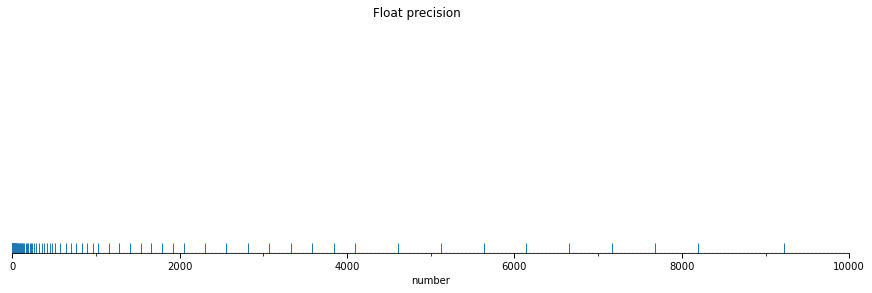

In [96]:
# python convert number to raw binary bits, and do some bit operation

fig0, axs0 = plt.subplots(1, 1, figsize=(15, 4))
fig0.suptitle('Float precision')

deltaBits = 0x1
deltaMantissa = 0x1 << 20
x = []
exp = 0
while(exp < 142):
    mantissa = 0
    while(mantissa < 2**23):
        x.append(assambleFloat32(0, exp, mantissa))
        mantissa += deltaMantissa
    exp += deltaBits
y = [0] * len(x)
axs0.set_xlabel("number")
axs0.patch.set_alpha(1)
setup(axs0, x, y)
plt.show()
fig0.savefig("float_precision.png",facecolor=(1,1,1,1))
#x[len(x) - 100:]

# after perspective divide

$M_p*P_w=\begin{bmatrix} s & 0 & 0 & 0 \\\ 0 & s & 0 & 0 \\\ 0 & 0 & \frac{f}{f-n} & -\frac{fn}{f-n} \\\ 0 & 0 & 1 & 0
\end{bmatrix}*\begin{bmatrix} x \\\ y \\\ z \\\ 1 \end{bmatrix}$

$d=\frac{f}{f-n}-\frac{fn}{f-n}*\frac{1}{z}$


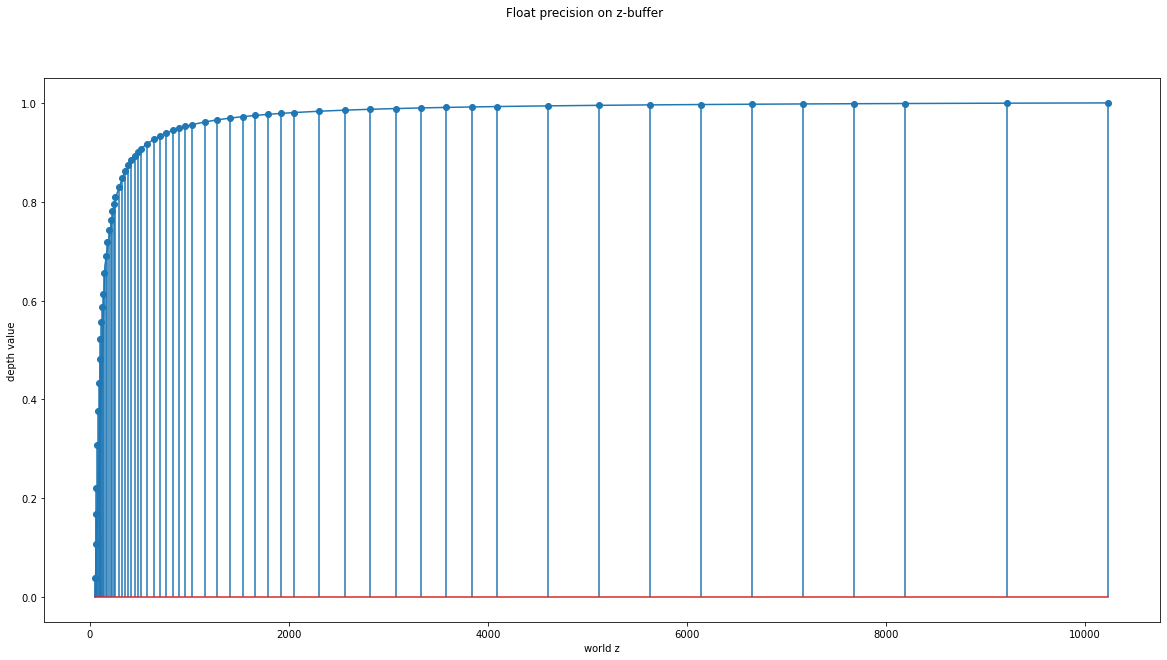

In [82]:
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import math

near = 50
far = 10000
a = -far*near/(far-near)
b = far/(far-near)

def projZ(z):
    return b + a/z
def slopeProjZ(z):
    return -a/z/z
def truncateList(min, max, l):
    minIdx = 0
    maxIdx = 0
    for i,x in enumerate(l):
        if x >= min:
            minIdx = i
            break
    for i,x in enumerate(l):
        if x >=max:
            maxIdx = i + 1
            break
    return l[minIdx: maxIdx]
star = mpath.Path.unit_regular_star(6)
circle = mpath.Path.unit_circle()
# concatenate the circle with an internal cutout of the star
verts = np.concatenate([circle.vertices, star.vertices[::-1, ...]])
codes = np.concatenate([circle.codes, star.codes])
cut_star = mpath.Path(verts, codes)

# plt.plot(np.arange(10)**2, '-r')
z = np.arange(near, far + 300, step = 100)
y = [projZ(v) for v in z]
slope = [slopeProjZ(v) for v in z]

fig0, axs0 = plt.subplots(1, 1, figsize=(20, 10))
fig0.suptitle('Float precision on z-buffer')

axs0.plot(z, y)

precisionX = truncateList(near, far, x)
# zeros = [0] * len(precisionX)
# axs0.plot(precisionX, zeros, linestyle="none", marker='|')

stemY = [projZ(val) for val in precisionX]
axs0.stem(precisionX, stemY)

axs0.set_xlabel('world z')
axs0.set_ylabel('depth value')

plt.show()
fig0.savefig("depth_precision.png", facecolor=(1,1,1,1))

#math.degrees(math.atan(slope[0]))

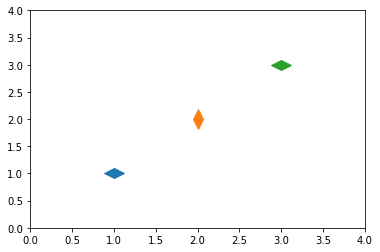

In [16]:
import matplotlib.pyplot as plt

x = [1,2,3]
for i in x:
    plt.plot(i, i, marker=(2, 1, i*90), markersize=20, linestyle='None')

plt.xlim([0,4])
plt.ylim([0,4])

plt.show()